In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import random
from skimage import io
import scipy.io as sio
import copy
cv.__version__

'3.4.2'

### Short Boudary detection

In [2]:
# prepare data
all_frame_1 = []
for i in range(22, 201):
    name = str(i) + '.jpg'
    if len(name) == 6:
        name = '0' + name
    pic = cv.imread("./project1/clip_1/" + name)
    RGB_img = cv.cvtColor(pic, cv.COLOR_BGR2RGB)
    all_frame_1.append(RGB_img)

In [3]:
def create_hist_diff(all_f):
    red_hists = []
    green_hists = []
    blue_hists = []
    wide, height = all_f[0].shape[1], all_f[0].shape[0]
    for img in all_f:
        red_hists.append(cv.calcHist([img],[0],None,[256],[0,256]))
        green_hists.append(cv.calcHist([img],[1],None,[256],[0,256]))
        blue_hists.append(cv.calcHist([img],[2],None,[256],[0,256]))
    result = []
    for i in range(1,len(red_hists)):
    #   find total number of how many pixels have different color, normallize it to 0~1
        red_diff = np.sum(np.abs(red_hists[i] - red_hists[i-1]))
        green_diff = np.sum(np.abs(green_hists[i] - green_hists[i-1]))
        blue_diff = np.sum(np.abs(blue_hists[i] - blue_hists[i-1]))
        result.append((red_diff + green_diff + blue_diff) / (3*wide*height))
    return result

In [4]:
# create histogram lists
red_hists_1 = []
green_hists_1 = []
blue_hists_1 = []
for img in all_frame_1:
    red_hists_1.append(cv.calcHist([img],[0],None,[256],[0,256]))
    green_hists_1.append(cv.calcHist([img],[1],None,[256],[0,256]))
    blue_hists_1.append(cv.calcHist([img],[2],None,[256],[0,256]))

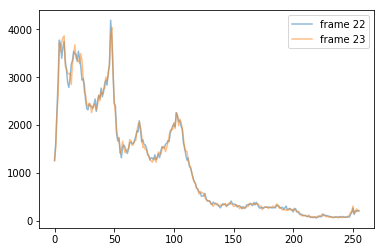

In [5]:
# case same shot
plt.plot(red_hists_1[0], alpha=0.5, label='frame 22')
plt.plot(red_hists_1[1], alpha=0.5, label='frame 23')
plt.legend(loc='upper right')
plt.show()

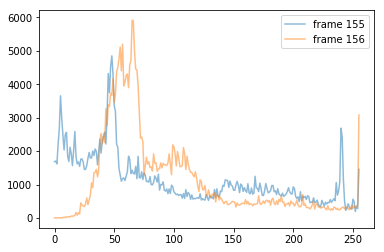

In [6]:
# case different shot
plt.plot(red_hists_1[155-22], alpha=0.5, label='frame 155')
plt.plot(red_hists_1[156-22], alpha=0.5, label='frame 156')
plt.legend(loc='upper right')
plt.show()

In [7]:
# calculate frame diffences
hist_diff_1 = []
for i in range(1,len(red_hists_1)):
#   find total number of how many pixels have different color, normallize it to 0~1
    red_diff = np.sum(np.abs(red_hists_1[i] - red_hists_1[i-1]))
    green_diff = np.sum(np.abs(green_hists_1[i] - green_hists_1[i-1]))
    blue_diff = np.sum(np.abs(blue_hists_1[i] - blue_hists_1[i-1]))
    hist_diff_1.append((red_diff + green_diff + blue_diff) / (3*all_frame_1[0].shape[0]*all_frame_1[0].shape[1]))

In [8]:
hist_diff_1[0],hist_diff_1[155-22]

(0.04691358024691358, 0.7114586191129401)

In [9]:
# precondition: shot_len > hist_diff
def find_boundary(hist_diff, shot_len = 8, shot_diff = 4, pace = 3):
    result = []
    prev_bound_i = 0
    for i in range(0, len(hist_diff) - shot_len, pace):
        slide_w = hist_diff[i:shot_len + i]
        suspect_frame_i = np.argmax(slide_w) + i
        
        if suspect_frame_i - prev_bound_i < shot_len:
            continue
             
        is_largest_neighbour = 0
        for neighbour in range(1,pace+1):
            prev = suspect_frame_i - neighbour
            after = suspect_frame_i + neighbour
            if prev < 0 or after >= len(hist_diff):
                break
            if hist_diff[suspect_frame_i] <= hist_diff[prev] or hist_diff[suspect_frame_i] <= hist_diff[after]:
                is_largest_neighbour = 1
                break
        if is_largest_neighbour == 1:
            continue
        
        window_avg = np.sum(hist_diff[prev_bound_i:suspect_frame_i]) / (suspect_frame_i - prev_bound_i)
        if window_avg * shot_diff > hist_diff[suspect_frame_i]:
            continue
        
        prev_bound_i = suspect_frame_i
        result.append(suspect_frame_i)
    return result

In [13]:
find_boundary(hist_diff_1)

[133]

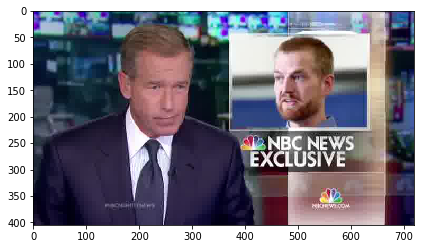

In [14]:
io.imshow(all_frame_1[133])

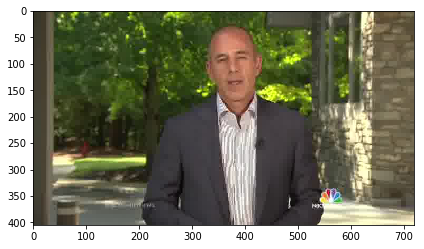

In [15]:
io.imshow(all_frame_1[133+1])

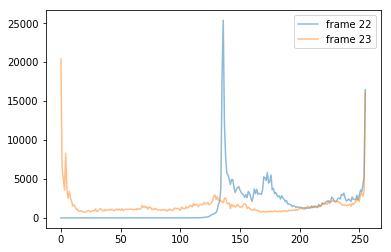

In [16]:
# prepare data
all_frame_2 = []
for i in range(65, 200):
    name = str(i) + '.jpg'
    if len(name) == 6:
        name = '0' + name
    pic = cv.imread("./project1/clip_2/" + name)
    RGB_img = cv.cvtColor(pic, cv.COLOR_BGR2RGB)
    all_frame_2.append(RGB_img)
red_hists_2 = []
green_hists_2 = []
blue_hists_2 = []
for img in all_frame_2:
    red_hists_2.append(cv.calcHist([img],[0],None,[256],[0,256]))
    green_hists_2.append(cv.calcHist([img],[1],None,[256],[0,256]))
    blue_hists_2.append(cv.calcHist([img],[2],None,[256],[0,256]))
# flash effect shot
plt.plot(red_hists_2[0], alpha=0.5, label='frame 22')
plt.plot(red_hists_2[1], alpha=0.5, label='frame 23')
plt.legend(loc='upper right')
plt.show()

In [17]:
hist_diff_2 = create_hist_diff(all_frame_2)
find_boundary(hist_diff_2, shot_len=3, pace=1, shot_diff=1.5)

[55, 72, 78, 86, 98, 110, 122]

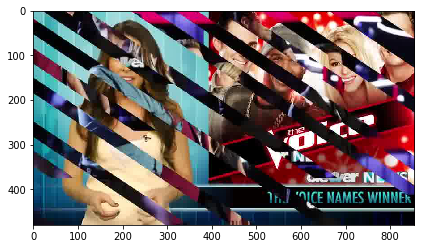

In [18]:
io.imshow(all_frame_2[54+1])

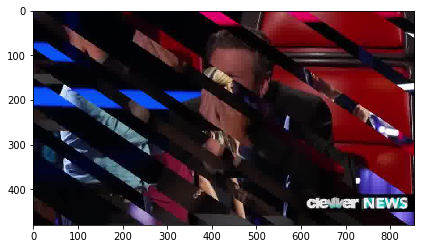

In [21]:
io.imshow(all_frame_2[72+1])

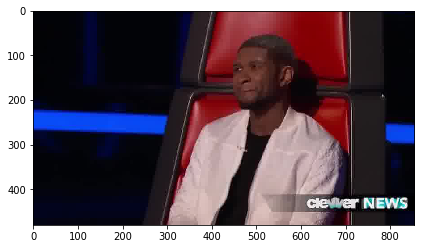

In [22]:
io.imshow(all_frame_2[78+1])

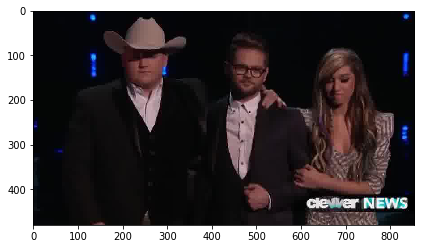

In [23]:
io.imshow(all_frame_2[86+1])

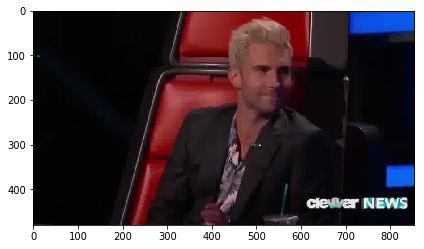

In [24]:
io.imshow(all_frame_2[98+1])

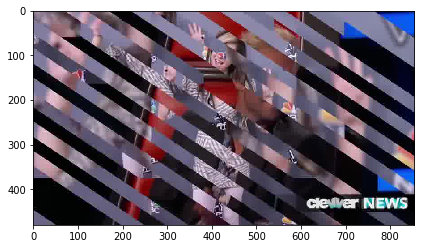

In [25]:
io.imshow(all_frame_2[110+1])

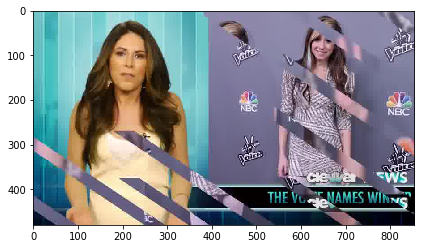

In [26]:
io.imshow(all_frame_2[122+1])

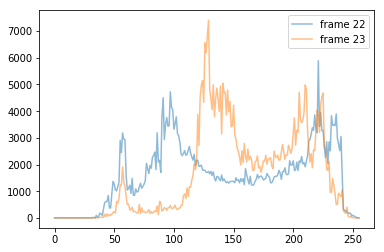

In [27]:
# prepare data
all_frame_3 = []
for i in range(16, 290):
    name = str(i) + '.jpg'
    if len(name) == 6:
        name = '00' + name
    elif len(name) == 7:
        name = '0' + name
    pic = cv.imread("./project1/clip_3/" + name)
    RGB_img = cv.cvtColor(pic, cv.COLOR_BGR2RGB)
    all_frame_3.append(RGB_img)
red_hists_3 = []
green_hists_3 = []
blue_hists_3 = []
for img in all_frame_3:
    red_hists_3.append(cv.calcHist([img],[0],None,[256],[0,256]))
    green_hists_3.append(cv.calcHist([img],[1],None,[256],[0,256]))
    blue_hists_3.append(cv.calcHist([img],[2],None,[256],[0,256]))
# blur in same shot - corner case
plt.plot(red_hists_3[48-16], alpha=0.5, label='frame 22')
plt.plot(red_hists_3[49-16], alpha=0.5, label='frame 23')
plt.legend(loc='upper right')
plt.show()

In [38]:
hist_diff_3 = create_hist_diff(all_frame_3)
find_boundary(hist_diff_3, shot_len=2, pace=2, shot_diff=2)

[32, 80, 148, 170, 245]

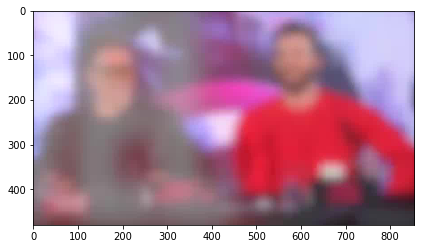

In [29]:
# blur and fade-in transaction
io.imshow(all_frame_3[32+1])

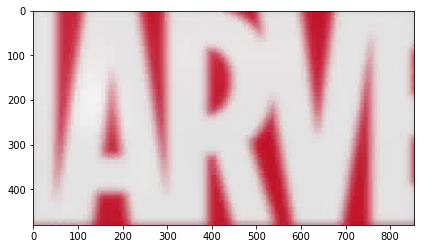

In [30]:
# blur and fade-in
io.imshow(all_frame_3[80+1])

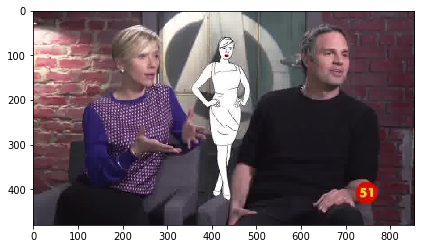

In [37]:
# close shot
io.imshow(all_frame_3[147+1])

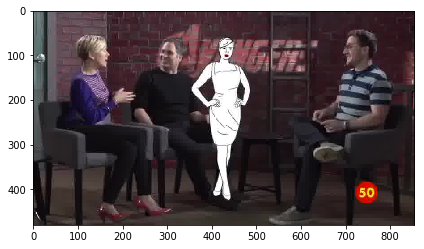

In [32]:
# change to long shot
io.imshow(all_frame_3[148+1])

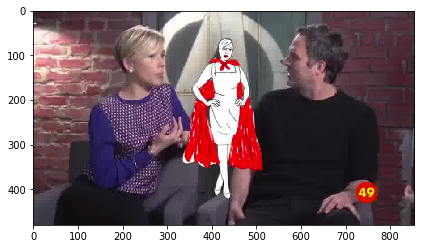

In [33]:
# back to close shot
io.imshow(all_frame_3[170+1])

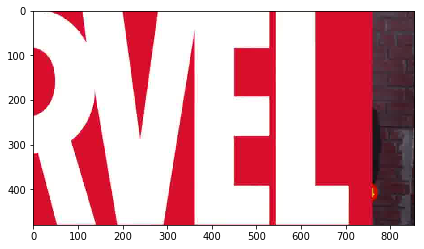

In [39]:
# fade-in
io.imshow(all_frame_3[245+1])

### Evaluating performance

In [43]:
# prepare parameter sets
shot_length_list = [1,2,3,4,6,8]
shot_diff_list = [1.5,1.8,2.5,3,4,4.5]
pace_list = [1,2,3,4]  

In [44]:
def evaluate_shot_detection(hist_diff, truth):
    truth_copy = copy.deepcopy(truth)
    measure_indices = []
    for sl in shot_length_list:
        for sd in shot_diff_list:
            for p in pace_list:
                if p <= sl: # otherwise we will skip checking some frames
                    predicts = find_boundary(hist_diff, shot_len=sl, shot_diff=sd, pace=p)
                    predicts_copy = copy.deepcopy(predicts)
                    correct = 0
                    for predict in predicts:
                        if predict in truth:
                            correct += 1
                            truth_copy.remove(predict)
                            predicts_copy.remove(predict)
                        elif predict+1 in truth:
                            correct += 1
                            truth_copy.remove(predict+1)
                            predicts_copy.remove(predict)
                        elif predict-1 in truth:
                            correct += 1
                            truth_copy.remove(predict-1)
                            predicts_copy.remove(predict)
                    miss = len(truth_copy)
                    false_positive = len(predicts_copy)
                    # restore global truth for next iteration
                    truth_copy = copy.deepcopy(truth)
                    # calculate indices
                    recall = correct/(correct+miss)
                    precision = correct/(correct+false_positive)
                    measure_indices.append([recall,precision])
    return np.array(measure_indices)

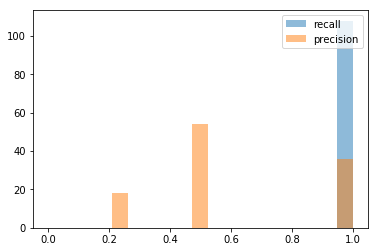

In [45]:
m_1 = evaluate_shot_detection(hist_diff_1, [133])

bins = np.linspace(0, 1, 20)
plt.hist(m_1[:,0], bins, alpha=0.5, label='recall')
plt.hist(m_1[:,1], bins, alpha=0.5, label='precision')
plt.legend(loc='upper right')
plt.show()

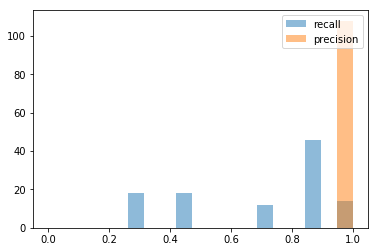

In [46]:
m_2 = evaluate_shot_detection(hist_diff_2, [54, 71, 78, 86, 98, 110, 122])

bins = np.linspace(0, 1, 20)
plt.hist(m_2[:,0], bins, alpha=0.5, label='recall')
plt.hist(m_2[:,1], bins, alpha=0.5, label='precision')
plt.legend(loc='upper right')
plt.show()

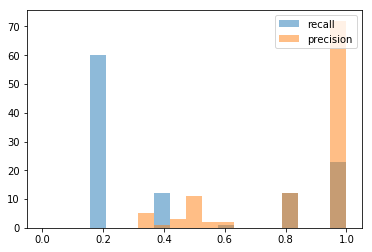

In [47]:
m_3 = evaluate_shot_detection(hist_diff_3, [32, 80, 148, 170, 245])

bins = np.linspace(0, 1, 20)
plt.hist(m_3[:,0], bins, alpha=0.5, label='recall')
plt.hist(m_3[:,1], bins, alpha=0.5, label='precision')
plt.legend(loc='upper right')
plt.show()

In [48]:
total_1 = (m_1[:,0]+m_1[:,1])/2
total_2 = (m_2[:,0]+m_2[:,1])/2
total_3 = (m_3[:,0]+m_3[:,1])/2
print(total_1.max(), total_2.max(), total_3.max())
def get_lower_bound(total, threshold=0.7):
    result = 0
    for e in total:
        if e>=0.7:
            result += 1
    return result/len(total)
print(get_lower_bound(total_1),get_lower_bound(total_2),get_lower_bound(total_3))

1.0 1.0 1.0
0.8333333333333334 0.8333333333333334 0.37962962962962965
